In [128]:
# import Matplot lib
%matplotlib inline

import matplotlib.pyplot as plt

In [298]:
#Import sklearn metrics being used
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import f_regression

# linear regression, regression models, preprocessing features used
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import Normalizer, PolynomialFeatures, scale
from sklearn.cross_validation import train_test_split
from sklearn.svm import SVR


import pandas as pd

In [299]:
# Importing the dataset
dataset = pd.read_csv('data/testData1.csv', sep=";")
# print(dataset.describe())


In [300]:
# Do correlation in features:
corrMatrix=dataset.corr()
print corrMatrix


          a         b         c         d         e         f         t
a  1.000000  0.032880  0.046430 -0.039519 -0.003290 -0.007998  0.137218
b  0.032880  1.000000 -0.016696 -0.057051 -0.017288  0.058332 -0.014048
c  0.046430 -0.016696  1.000000 -0.007658 -0.003853 -0.006964 -0.116489
d -0.039519 -0.057051 -0.007658  1.000000  0.024153 -0.000125  0.019005
e -0.003290 -0.017288 -0.003853  0.024153  1.000000 -0.015087  0.003264
f -0.007998  0.058332 -0.006964 -0.000125 -0.015087  1.000000 -0.000855
t  0.137218 -0.014048 -0.116489  0.019005  0.003264 -0.000855  1.000000


In [314]:
chosen_fields = ['a', 'b', 'c', 'd', 'e', 'f']
X = dataset[chosen_fields]
y = dataset[['t']]

# to check p-value and t-values for features to check if they're important
print f_regression(X,y)

# Normalize the input features values
# X[['a', 'b', 'c', 'd', 'e', 'f']] = Normalizer().fit_transform(X)
X[chosen_fields] = scale(X)


(array([  1.91516858e+01,   1.96992652e-01,   1.37287290e+01,
         3.60610054e-01,   1.06316810e-02,   7.30144341e-04]), array([  1.33434926e-05,   6.57255531e-01,   2.22797190e-04,
         5.48303962e-01,   9.17896349e-01,   9.78448240e-01]))


/Users/techkriti/Projects/Kaggle/kaggle/lib/python2.7/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/techkriti/Projects/Kaggle/kaggle/lib/python2.7/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [315]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)


In [316]:
# try out different algorithms
# cv = StratifiedKFold(n_folds=5, random_state=0)

regressor_lo = Lasso(alpha=1)

regressor_gbr = GradientBoostingRegressor(loss='ls', alpha=0.8,
                                n_estimators=80, max_depth=5,
                                learning_rate=0.1, min_samples_leaf=9,
                                min_samples_split=10)
# Mean squared error: 280752.93
# Variance score: 0.48

regressor_li = LinearRegression()

regressor_ri = Ridge(alpha=1e-2, normalize=True, solver='cholesky',)
regressor = SVR(C=1e4, gamma=1e-2, kernel='rbf')


In [318]:
regressor.fit(X_train, y_train)

print X_test

# Predicting the Test set result
y_pred = regressor.predict(X_test)

# print('Coefficients: \n', regressor.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

# Check how well your model fits around mean of 
y_pred_train = regressor.predict(X_train)
print r2_score(y_train, y_pred_train)

            a         b         c         d         e         f
507 -0.012041  0.322241  0.057541  0.822555  1.414246 -1.088359
818 -0.113473 -0.984810 -0.024277 -1.206246 -1.376570  0.230864
452  0.935976  0.184280 -0.864011  0.630563 -1.376570  1.110346
368  0.824148 -0.757942 -1.055360 -1.421119 -0.678866 -0.648618
242 -1.309244 -0.470097  0.723083 -0.370293  0.018838 -1.088359
929  1.148764 -0.276611  0.684813 -1.585890  0.716542 -0.208877
262 -1.101339  1.321350  0.631587 -0.099926  0.716542  1.550087
810 -0.897529  0.861821 -1.205800 -1.526320 -1.376570  1.550087
318 -1.314285 -1.343168 -0.176036 -1.511460 -0.678866  0.230864
49   0.616558 -0.944955 -1.464450 -1.321441  1.414246  0.670605
446 -1.705052  1.106403  0.209741 -0.629350  0.018838  0.670605
142 -1.381224  0.929268  0.451676 -0.644473 -1.376570  0.670605
968  1.553550  0.333482  0.617951  0.993638 -0.678866 -1.528100
345  0.424245 -1.228371 -0.672663 -1.447551  1.414246  0.670605
971 -0.928872 -0.067797 -1.244069  0.311

/Users/techkriti/Projects/Kaggle/kaggle/lib/python2.7/site-packages/sklearn/svm/base.py:216: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True).astype(np.float64)


In [309]:
print('Variance score: %.2f' % r2_score(y_test, y_pred))

# Regressor variables
# print ( "Coefficients :" , regressor.coef_)
# print ("Intercept :" , regressor.intercept_)


Variance score: 0.01


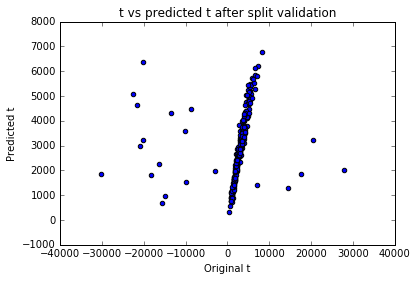

In [310]:
#see the model fit
plt.scatter(y_test, y_pred)
plt.title("t vs predicted t after split validation")
plt.xlabel("Original t")
plt.ylabel("Predicted t")


In [311]:
predicted_df = X_test
predicted_df['t'] = y_test
predicted_df['t_pred'] = y_pred

print predicted_df[['t', 't_pred']]


            t       t_pred
507   3405.33  2899.129233
818   2962.22  2743.999859
452   4663.06  4663.081800
368   5478.78  4933.852217
242   1290.48  1112.667541
929   3623.37  3382.059543
262   1245.81  1366.008175
810   2343.47  2322.344260
318   1710.89  1627.244392
49    5375.08  5207.954121
446   1027.28   993.189419
142   1397.70  1191.963505
968   4716.11  3798.854734
345   4822.13  4177.192378
971   2129.54  2660.542557
133 -20168.96  6386.266545
104  -9829.19  1541.170555
6     4045.75  3733.332541
600   4703.47  4096.745804
496   2447.01  2428.206401
702   3925.10  3265.534985
472   3110.96  3307.683334
598   3721.18  3790.025687
502   4942.32  5261.356046
433   3104.35  2994.888696
119   1877.08  1652.978718
108   1459.15  1280.095223
647   2336.22  2865.351471
589   3064.80  3236.970429
374    832.72   770.423904
..        ...          ...
309   2133.08  2402.682076
892   1472.24  1219.495014
301   6394.32  5536.656375
920   1299.74  1329.244592
594   3389.46  3182.308084
7

/Users/techkriti/Projects/Kaggle/kaggle/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/techkriti/Projects/Kaggle/kaggle/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [312]:
# Write the final DF to test set
# test_set = pd.read_csv('data/testData6.csv', sep=";")

# #Fit regression on completeData
# regressor.fit(X, y)


# test_predicted = regressor.predict(test_set)
# print test_predicted

# Save the model to disk - Please see the read.md file to see how to use these models
import pickle
filename = 'models/testData1.model'
pickle.dump(regressor, open(filename, 'wb'))

